In [57]:
# Imports

import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series

from scipy import stats

import matplotlib as pl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline 

## Histograms 

In [7]:
dataset1 = randn(1000)
dataset2 = randn(100)

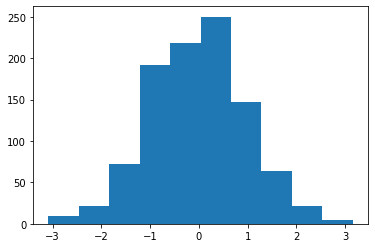

In [10]:
plt.hist(dataset1)
plt.savefig('histogram1.png')
plt.show()

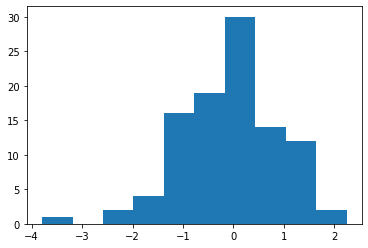

In [11]:
plt.hist(dataset2)
plt.show()

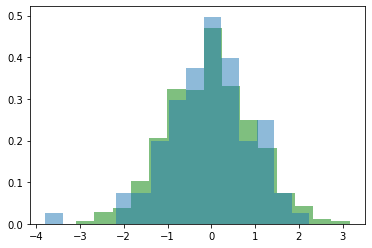

In [15]:
plt.hist(dataset1, density=True, color='green', bins=15, alpha=0.5)
plt.hist(dataset2, density=True, bins=15, alpha=0.5)
plt.show()

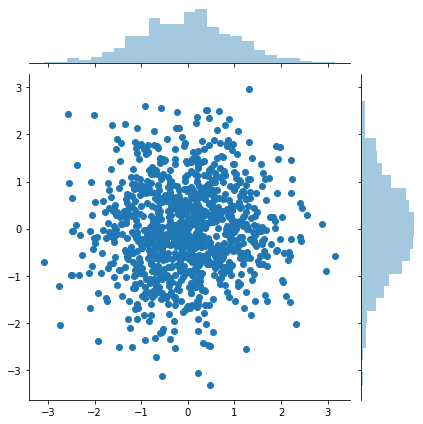

In [21]:
# With Seaborn - scater plot with histograms

dataset3 = randn(1000)

sns_plot = sns.jointplot(dataset1, dataset3)
plt.show()

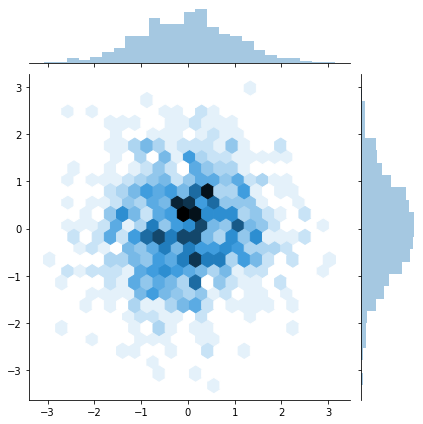

In [24]:
sns_plot2 = sns.jointplot(dataset1, dataset3, kind='hex')
plt.show()

## KDE Plots

Kernel Density Estimation (KDE)

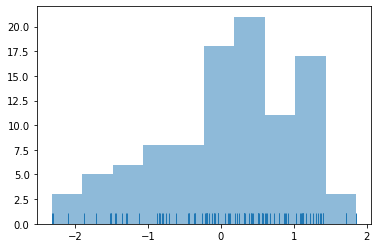

In [32]:
# Manually create KDE by summing the gausian distribution

ds = randn(100)

sns.rugplot(ds)

plt.hist(ds, alpha=0.5)

plt.show()

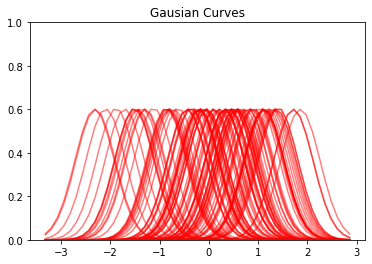

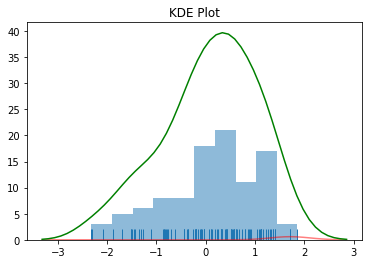

In [40]:
x_axes = np.linspace(ds.min()-1, ds.max()+1, 50)

# bandwidth creation
bandwidth = ((4*ds.std()**5)/(3*len(ds)))**0.2

kernels = []

for point in ds:
    kernel = stats.norm(point, bandwidth).pdf(x_axes)
    kernels.append(kernel)
    
    kernel = kernel / kernel.max() # normalization
    kernel = kernel * 0.6
    
    plt.plot(x_axes, kernel, alpha=0.5, color='red') # Gausian curves
    
plt.ylim(0, 1)
plt.title('Gausian Curves')
plt.show()

kde = np.sum(kernels, axis=0)
plt.plot(x_axes, kernel, alpha=0.5, color='red') # Gausian curves
kde_fig = plt.plot(x_axes, kde, color='green')
plt.hist(ds, alpha=0.5)
sns.rugplot(ds)
plt.title('KDE Plot')
plt.show()

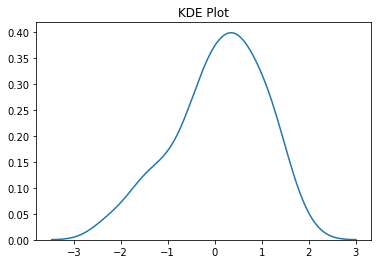

In [42]:
# KDE with Seaborn - simple - shortcur

sns.kdeplot(ds)
plt.title('KDE Plot')
plt.show()

## KDE for Dataframes

In [44]:
mean = [0,0]
covariance = [[1,0],[0,100]]

ds = np.random.multivariate_normal(mean, covariance, 500)

dframe = pd.DataFrame(ds, columns=['col1', 'col2'])
print(dframe)

         col1       col2
0   -0.658443   7.152083
1    0.247589  -1.728078
2    0.186595  28.766593
3   -0.030200  14.416171
4   -0.352497 -15.115658
..        ...        ...
495  0.274792   2.109387
496  0.413818   4.758526
497 -0.916294 -12.997191
498 -0.833956  12.379629
499 -0.530650  11.461243

[500 rows x 2 columns]


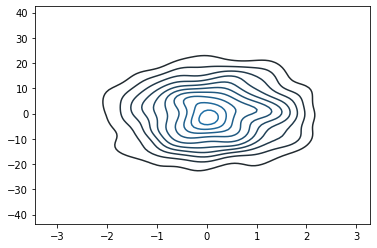

In [46]:
sns.kdeplot(dframe)
plt.show()

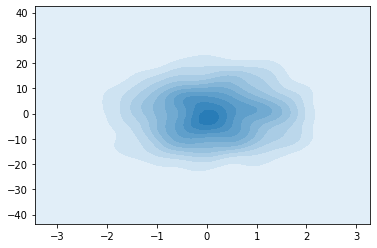

In [50]:
# With shade

sns.kdeplot(dframe, shade=True)
plt.show()

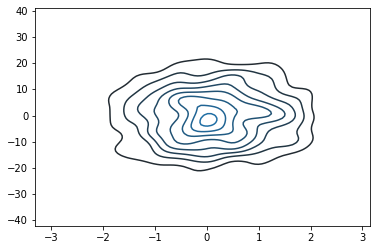

In [54]:
#  Bandwidth change

sns.kdeplot(dframe, bw='silverman')
plt.show()

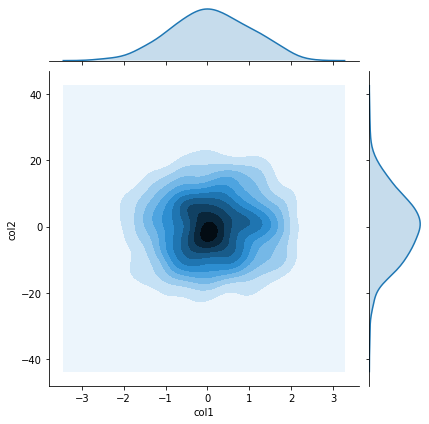

In [56]:
# Kind change on Seaborn joinplot

sns.jointplot('col1', 'col2', dframe, kind='kde')
plt.show()

## Multiple Plots 

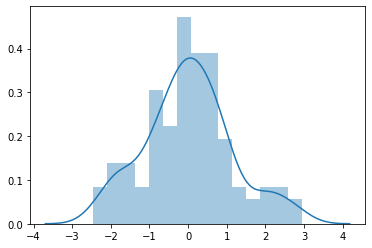

In [58]:
ds = randn(100)

sns.distplot(ds, bins=15)
plt.show()

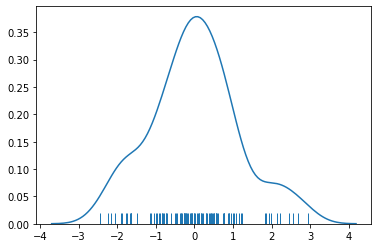

In [59]:
sns.distplot(ds, hist=False, rug=True, bins=10)
plt.show()

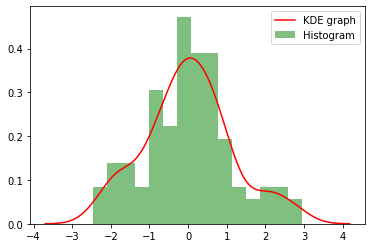

In [60]:
# Changing parameters

sns.distplot(ds, bins=15, 
             kde_kws={'color':'red', 'label':'KDE graph'}, 
             hist_kws={'label':'Histogram', 'color':'green', 'alpha':0.5})
plt.show()

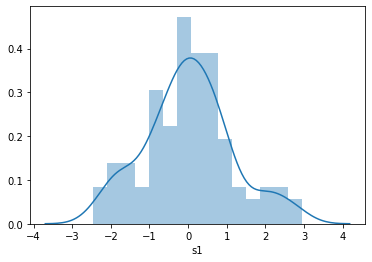

In [62]:
# With a Pandas series
s1 = Series(ds, name='s1')

sns.distplot(s1, bins=15)
plt.show()

## Box Plots

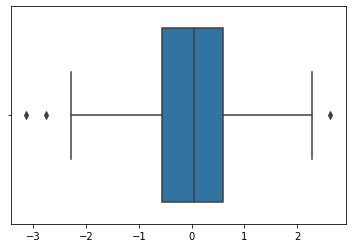

In [63]:
df1 = randn(80)

sns.boxplot(df1)
plt.show()

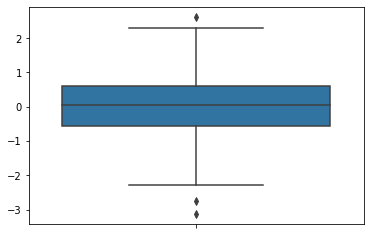

In [65]:
sns.boxplot(df1, orient='v') # Vertical box plot
plt.show()

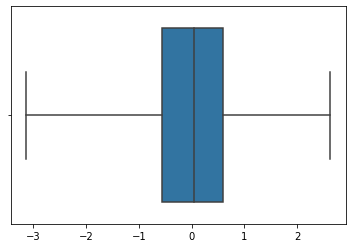

In [68]:
sns.boxplot(df1, whis=np.inf) # No outliers
plt.show()

## Violin Plots

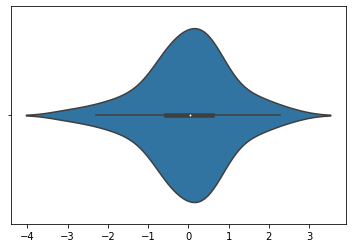

In [69]:
sns.violinplot(df1)
plt.show()

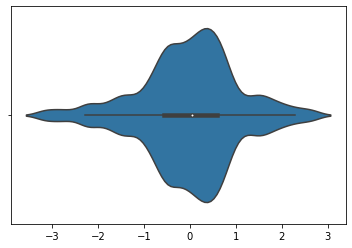

In [70]:
sns.violinplot(df1, bw=0.2)
plt.show()

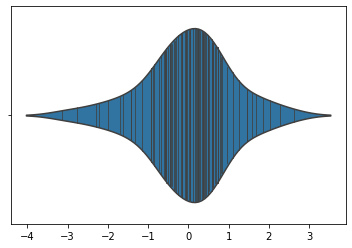

In [71]:
sns.violinplot(df1, inner='stick')
plt.show()

## Heatmaps

In [72]:
df = sns.load_dataset('flights')
print(df)

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]


In [73]:
df2 = df.pivot('year', 'month', 'passengers')
print(df2)

month  January  February  March  April  May  June  July  August  September  \
year                                                                         
1949       112       118    132    129  121   135   148     148        136   
1950       115       126    141    135  125   149   170     170        158   
1951       145       150    178    163  172   178   199     199        184   
1952       171       180    193    181  183   218   230     242        209   
1953       196       196    236    235  229   243   264     272        237   
1954       204       188    235    227  234   264   302     293        259   
1955       242       233    267    269  270   315   364     347        312   
1956       284       277    317    313  318   374   413     405        355   
1957       315       301    356    348  355   422   465     467        404   
1958       340       318    362    348  363   435   491     505        404   
1959       360       342    406    396  420   472   548     559 

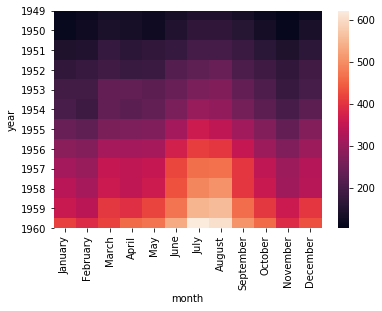

In [74]:
sns.heatmap(df2)
plt.show()

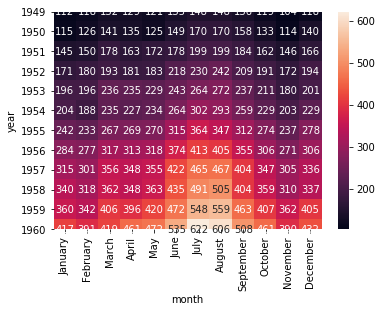

In [75]:
sns.heatmap(df2, annot=True, fmt='d')
plt.show()

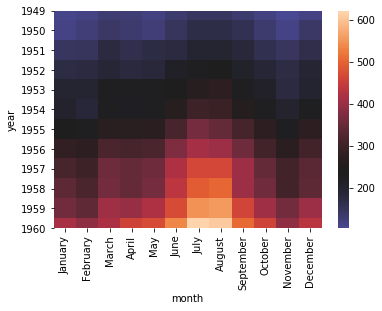

In [77]:
sns.heatmap(df2, center=df2.loc[1955,'January'])
plt.show()

## Clusters

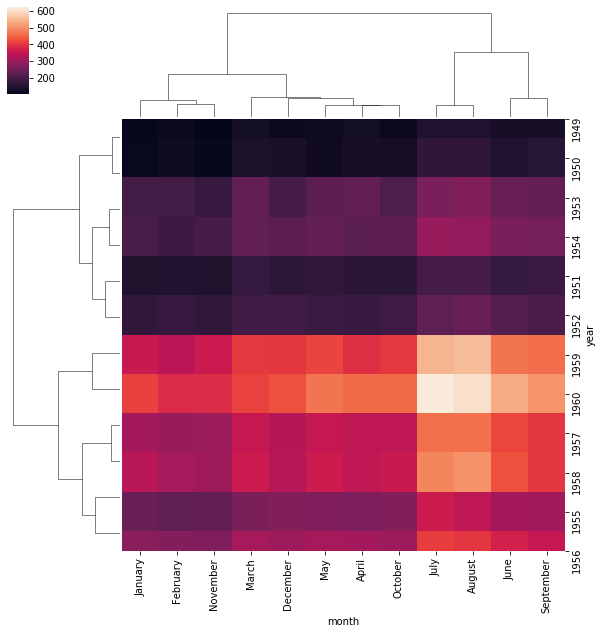

In [78]:
sns.clustermap(df2)
plt.show()

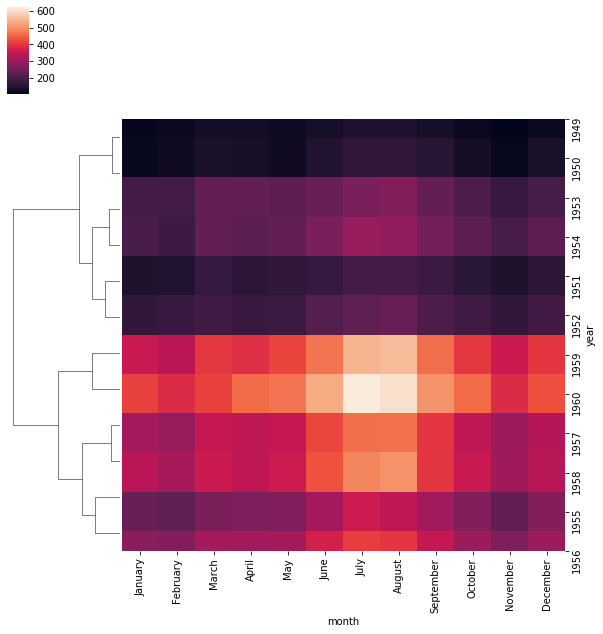

In [79]:
sns.clustermap(df2, col_cluster=False)
plt.show()

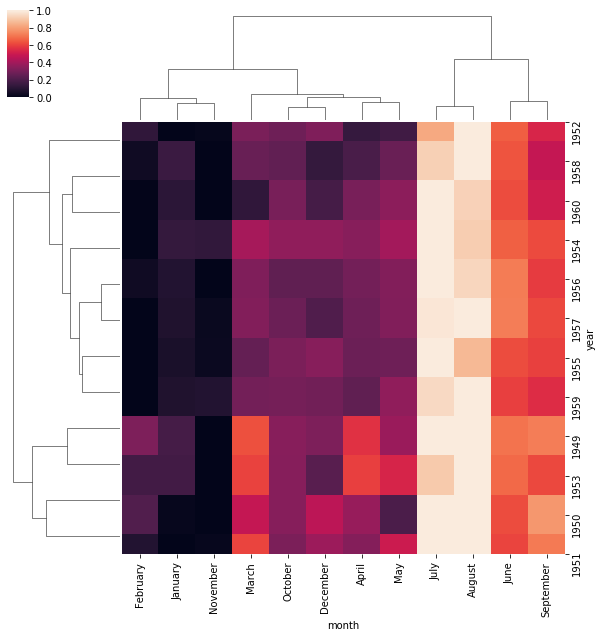

In [80]:
# Standardize by rows

sns.clustermap(df2, standard_scale=0)
plt.show()

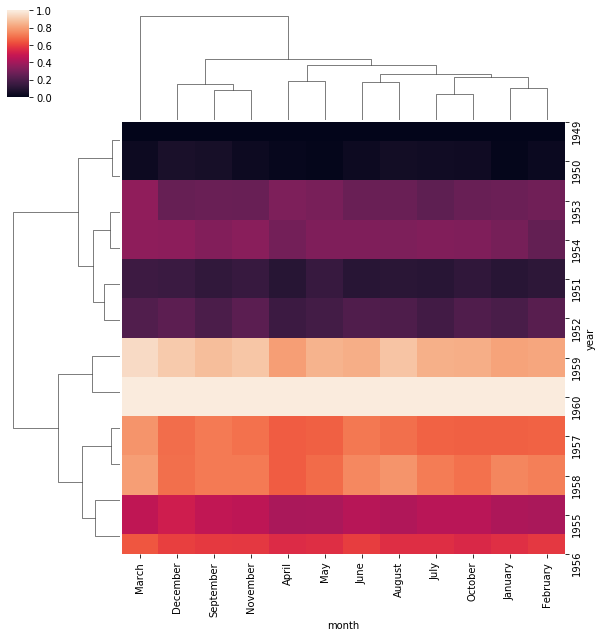

In [81]:
# Standardize by columns

sns.clustermap(df2, standard_scale=1)
plt.show()